In [2]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#reading and previewing the dataset 
df = pd.read_csv("AS24_Case_Study_Data.csv", sep=";")
df.head()

,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr
0,350625839,Basic,Mitsubishi,16750,5,2013,24.07.18,24.08.18,3091.0,123.0,30,0.03780329990294403
1,354412280,Basic,Mercedes-Benz,35950,4,2015,16.08.18,07.10.18,3283.0,223.0,52,0.06792567773378008
2,349572992,Basic,Mercedes-Benz,11950,3,1998,16.07.18,05.09.18,3247.0,265.0,51,0.0816137973514013
3,350266763,Basic,Ford,1750,6,2003,20.07.18,29.10.18,1856.0,26.0,101,0.014008620689655173
4,355688985,Basic,Mercedes-Benz,26500,3,2014,28.08.18,08.09.18,490.0,20.0,12,0.04081632653061224


Imported AutoViz_Class version: 0.0.85. Call using:
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 does not show plot but creates them and saves them in AutoViz_Plots directory in your local machine.
Shape of your Data Set loaded: (78321, 12)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    11 Predictors classified...
        This does not include the Target column(s)
        4 variables removed since they were ID or low-information variables

################ Multi_Classification VISUALIZATION Started #####################


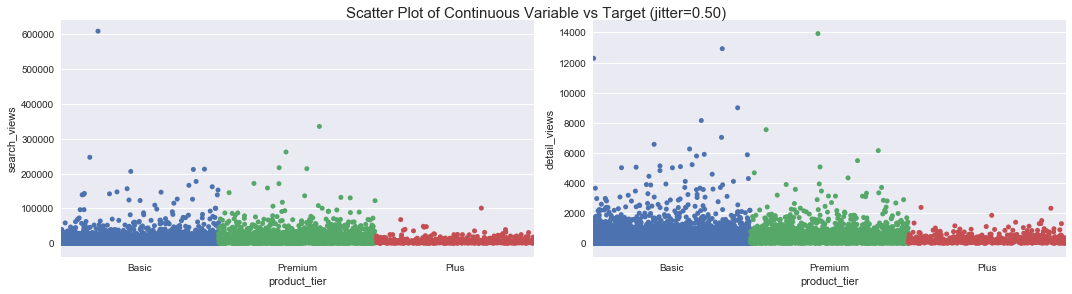

Total Number of Scatter Plots = 3


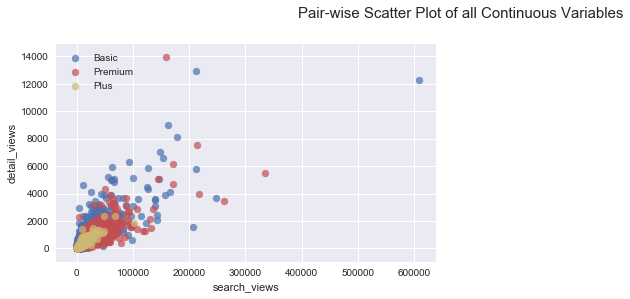

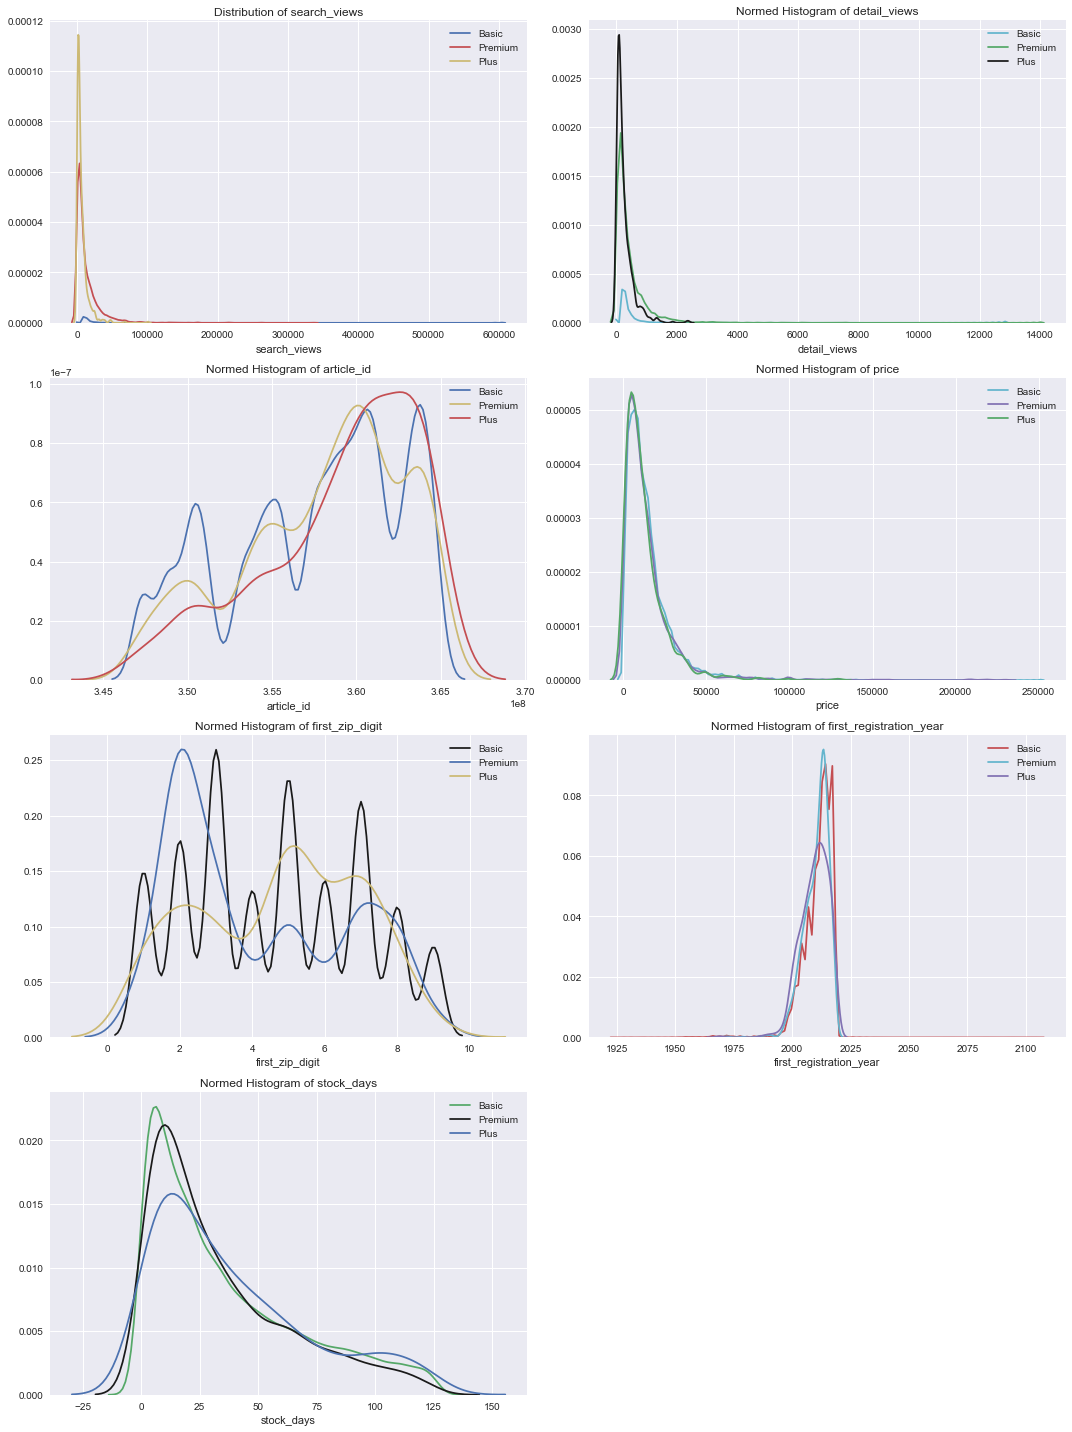

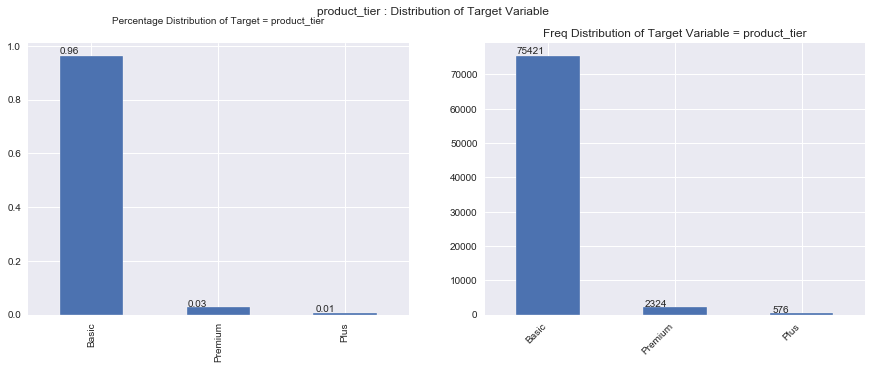

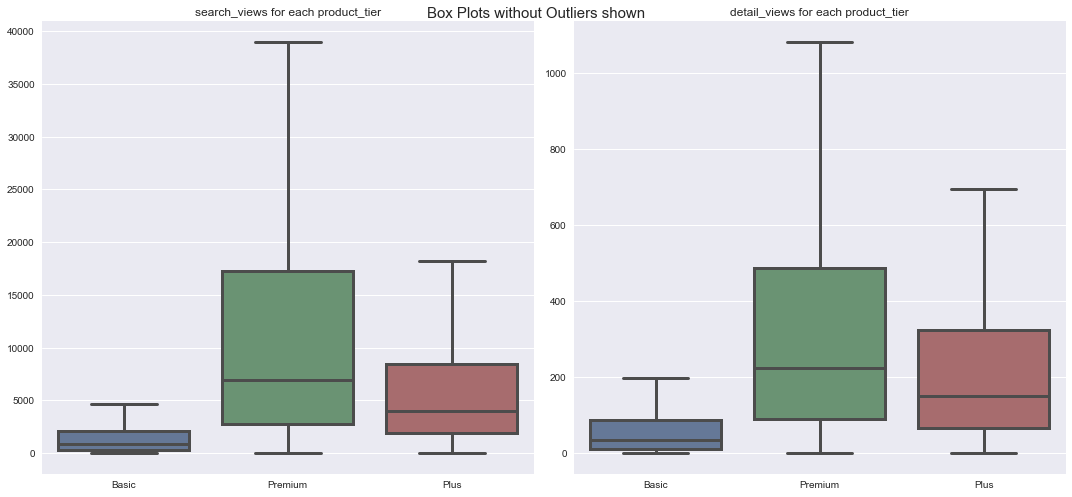

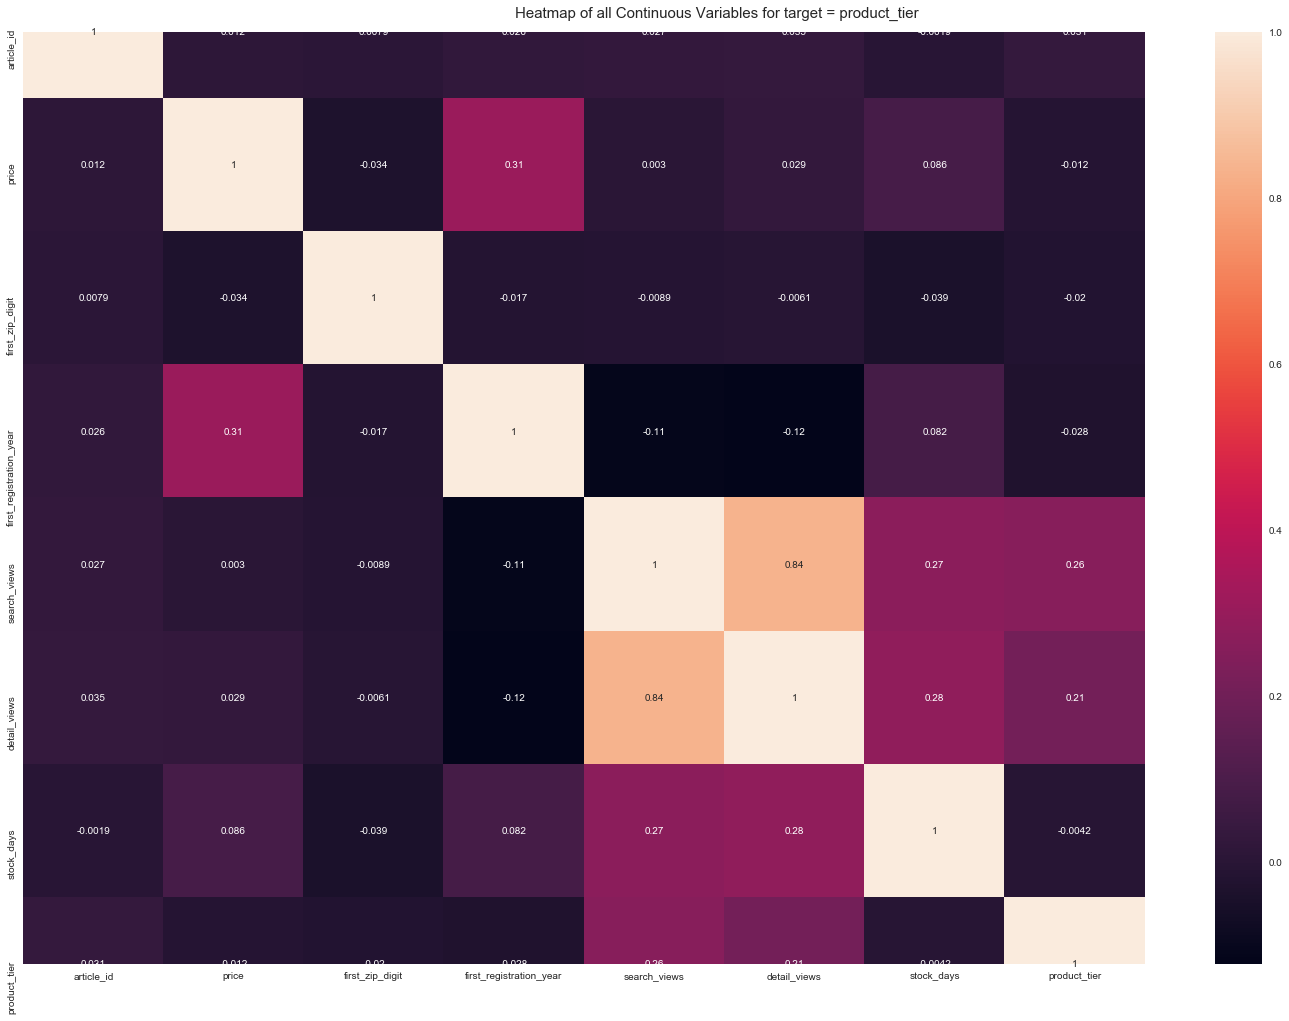

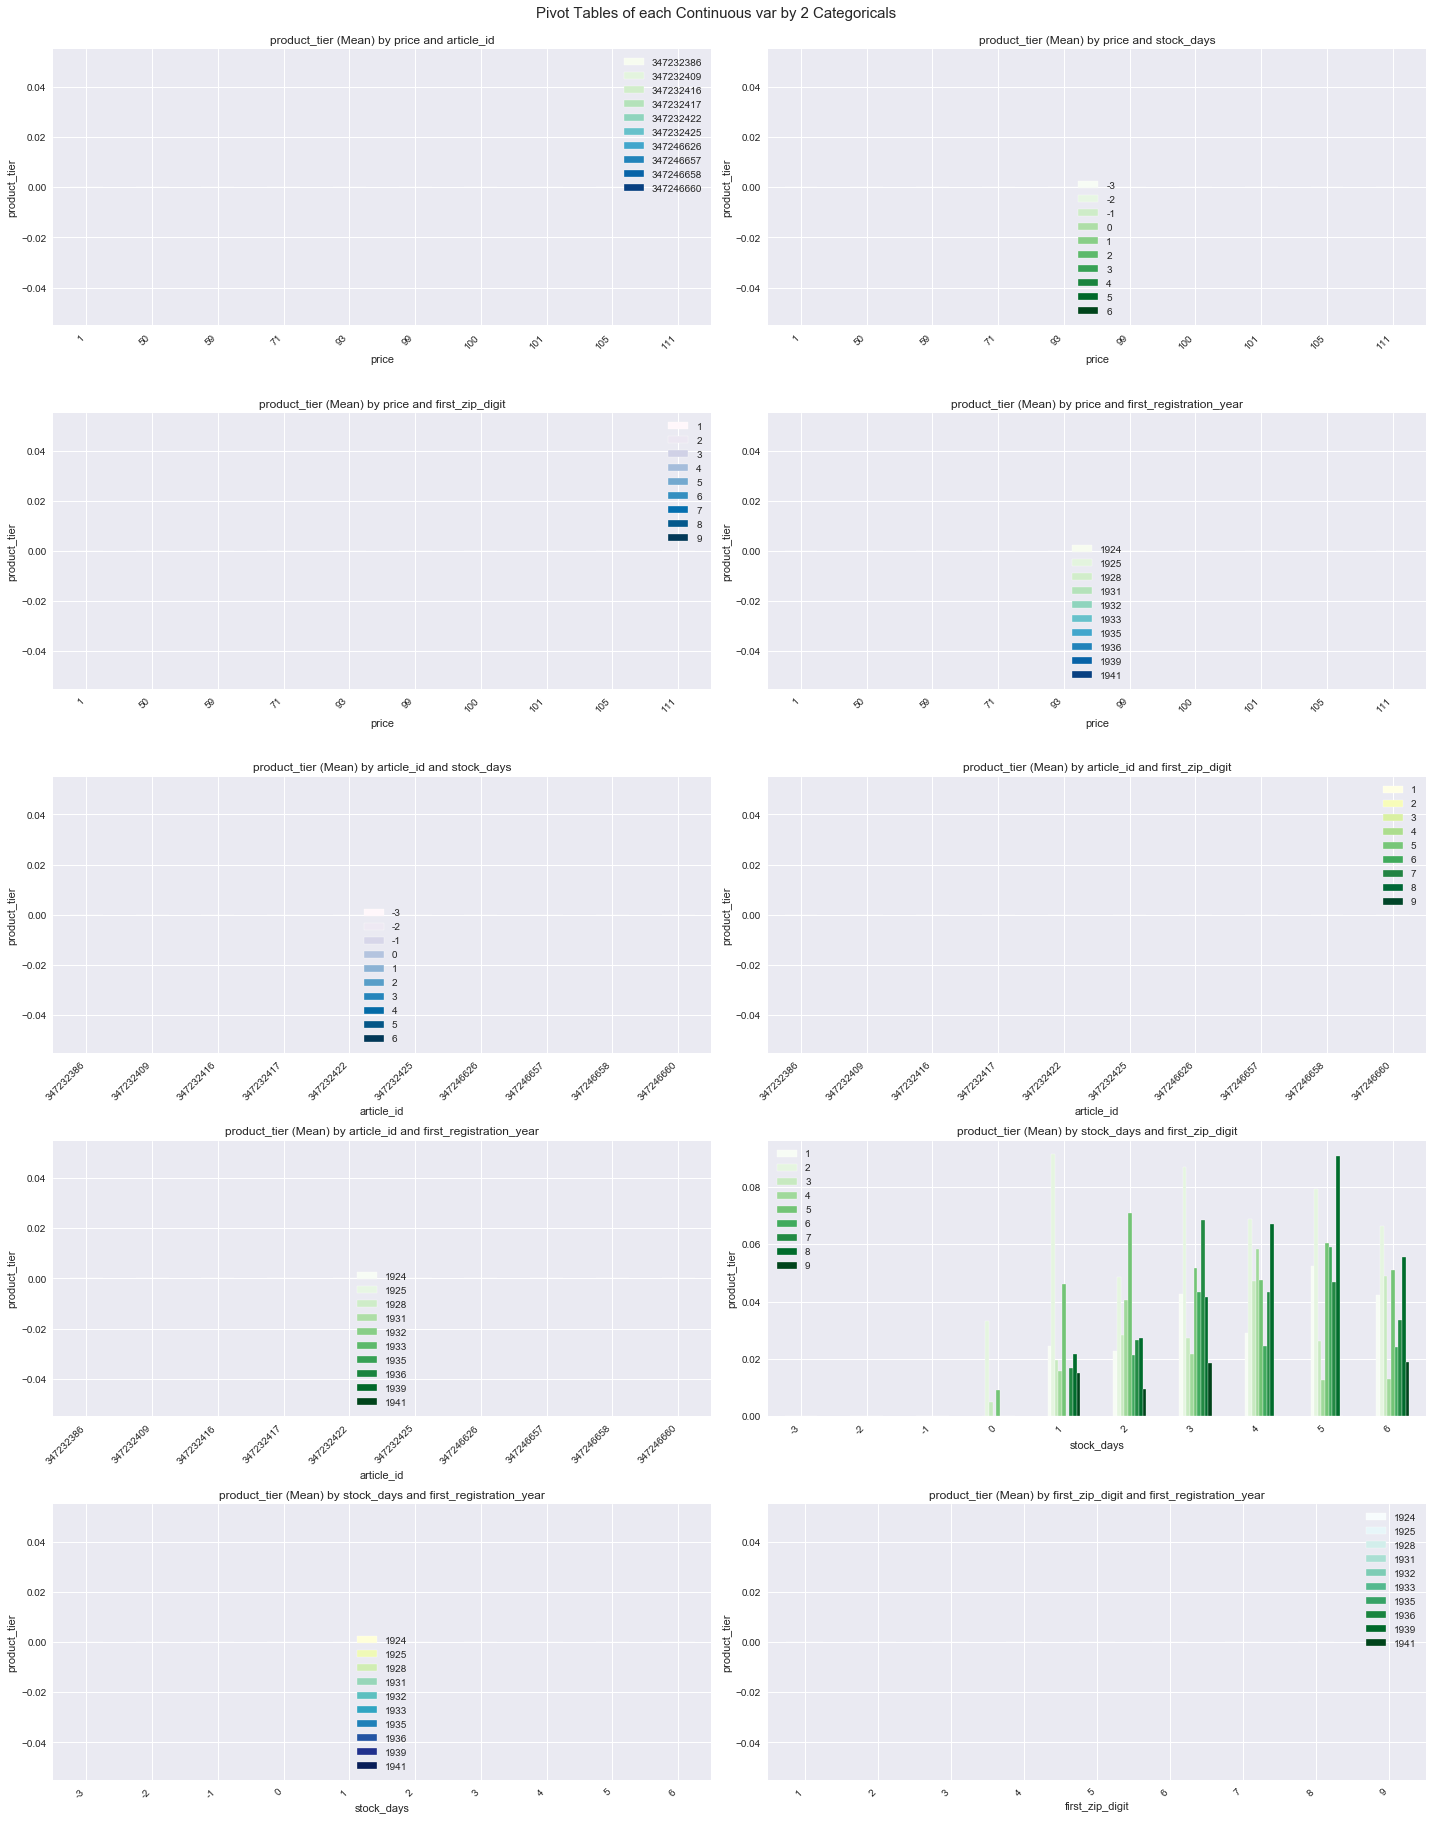

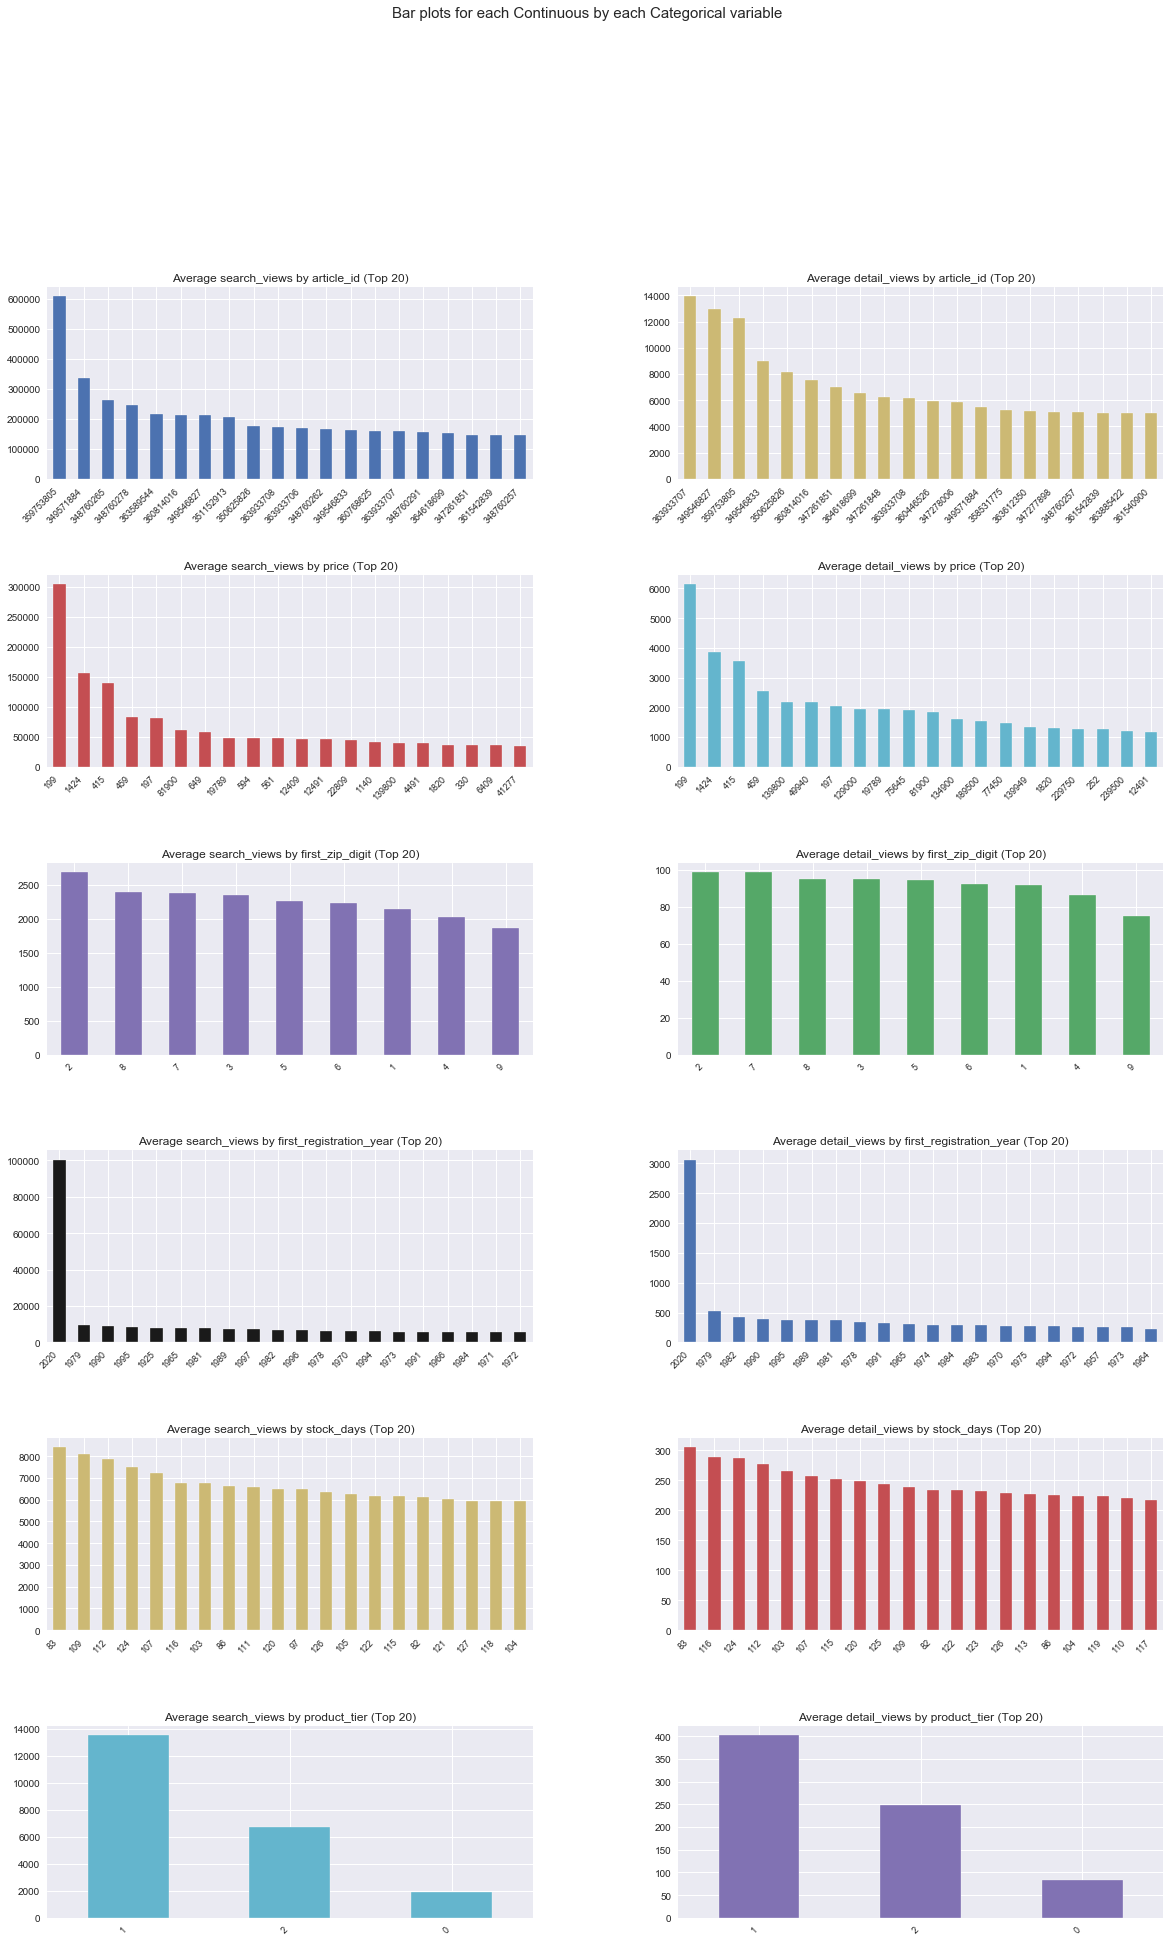

Time to run AutoViz (in seconds) = 67

 ###################### VISUALIZATION Completed ########################


,article_id,price,first_zip_digit,first_registration_year,search_views,detail_views,stock_days,product_tier
0,350625839,16750,5,2013,3091.0,123.0,30,0
1,354412280,35950,4,2015,3283.0,223.0,52,0
2,349572992,11950,3,1998,3247.0,265.0,51,0
3,350266763,1750,6,2003,1856.0,26.0,101,0
4,355688985,26500,3,2014,490.0,20.0,12,0
...,...,...,...,...,...,...,...,...
78316,348704581,15740,8,2014,6895.0,230.0,99,0
78317,359231940,2950,6,2006,1175.0,16.0,25,0
78318,362425932,7850,8,2014,448.0,21.0,16,0
78319,357164227,13945,5,2011,1617.0,29.0,28,0


In [4]:
#Running EDA visualizations
from autoviz.AutoViz_Class import AutoViz_Class
 
AV = AutoViz_Class()
AV.AutoViz('AS24_Case_Study_Data.csv', sep = ';', depVar='product_tier')

In [5]:
df.shape

(78321, 12)

In [6]:
#missing values
df.isnull().sum().sort_values(ascending=False)

ctr                        24
detail_views               10
search_views               10
stock_days                  0
deleted_date                0
created_date                0
first_registration_year     0
first_zip_digit             0
price                       0
make_name                   0
product_tier                0
article_id                  0
dtype: int64

In [7]:
#duplicates
df.duplicated().sum()

0

In [8]:
df.describe()

,article_id,price,first_zip_digit,first_registration_year,search_views,detail_views,stock_days
count,7.832100e+04,78321.000000,78321.000000,78321.000000,78311.000000,78311.000000,78321.000000
mean,3.574869e+08,15067.655316,4.632117,2011.089465,2297.502522,93.469870,35.986262
std,5.076572e+06,16374.497606,2.354275,6.538395,6339.034423,228.025588,32.214835
min,3.472324e+08,1.000000,1.000000,1924.000000,0.000000,0.000000,-3.000000
25%,3.536387e+08,5750.000000,3.000000,2008.000000,367.000000,13.000000,10.000000
50%,3.585480e+08,10900.000000,5.000000,2013.000000,920.000000,36.000000,25.000000
75%,3.614817e+08,18890.000000,7.000000,2015.000000,2234.000000,94.000000,55.000000
max,3.647040e+08,249888.000000,9.000000,2106.000000,608754.000000,13926.000000,127.000000


**Data Exploration Findings**

1- The data values of the column "product_tier" is highly imbalanced with one product tier having almost 96% of the values.

2- There is a strong correlation between "search_views" and "detail_views" which can lead to multicollinearity when both are features (in the classification problem).

3- Since "search_views" has a slightly more correlation with the "product_tier", I will drop "detail_views" for the classification problem.

4- There are 3 columns containing missing values and since they would not have a significant impact on our data, I will drop them.

5- "stock_days" has incorrect min value of "-3" (number of days can't be a negative number).

6- There are categorical features that would need one hot encoding. 

7- Some data types need to be corrected.

8- New features can be engineered from the columns "created_date" and "deleted_date" 

9- The max value of first_registration_year is 2106 which impossible too.

# Data Cleaning

In [9]:
#creating a copy of the source data 

data = df.copy()

In [10]:
#dropping the unnecessary columns
df.drop("article_id", axis=1, inplace=True)

In [11]:
df.head()

,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr
0,Basic,Mitsubishi,16750,5,2013,24.07.18,24.08.18,3091.0,123.0,30,0.03780329990294403
1,Basic,Mercedes-Benz,35950,4,2015,16.08.18,07.10.18,3283.0,223.0,52,0.06792567773378008
2,Basic,Mercedes-Benz,11950,3,1998,16.07.18,05.09.18,3247.0,265.0,51,0.0816137973514013
3,Basic,Ford,1750,6,2003,20.07.18,29.10.18,1856.0,26.0,101,0.014008620689655173
4,Basic,Mercedes-Benz,26500,3,2014,28.08.18,08.09.18,490.0,20.0,12,0.04081632653061224


In [12]:
#dropping missing values & duplicates
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [13]:
df.isnull().sum()

product_tier               0
make_name                  0
price                      0
first_zip_digit            0
first_registration_year    0
created_date               0
deleted_date               0
search_views               0
detail_views               0
stock_days                 0
ctr                        0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [15]:
#checking the dtypes
df.dtypes

product_tier                object
make_name                   object
price                        int64
first_zip_digit              int64
first_registration_year      int64
created_date                object
deleted_date                object
search_views               float64
detail_views               float64
stock_days                   int64
ctr                         object
dtype: object

conversions

- "created_date" and "deleted_date" to date

- "search_views" and "detail_views" to int

- "ctr" to float

In [16]:
#converting 'search_views' and 'detail_views' dtypes to Int64
df.search_views = df.search_views.astype('Int64')
df.detail_views = df.detail_views.astype('Int64')

In [17]:
#changing the 'created_date' and 'deleted_date' dtypes to datetime
for col_name in df.columns:
    if 'date' in col_name:
        df[col_name] = pd.to_datetime(df[col_name], dayfirst=True)

**changing ctr to float**

Some values of ctr have multiple dots, which prevents the conversion to float


In [18]:
#removing the exrra dots
df.ctr = df.ctr.apply(lambda x: x.replace('.', '[DOT]', 1).replace('.', '').replace('[DOT]', '.'))

In [20]:
df.drop(index=39172, inplace=True)

In [22]:
df.ctr = df.ctr.astype('float64')

In [23]:
df.dtypes

product_tier                       object
make_name                          object
price                               int64
first_zip_digit                     int64
first_registration_year             int64
created_date               datetime64[ns]
deleted_date               datetime64[ns]
search_views                        Int64
detail_views                        Int64
stock_days                          int64
ctr                               float64
dtype: object

In [24]:
data.head()

,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr
0,350625839,Basic,Mitsubishi,16750,5,2013,24.07.18,24.08.18,3091.0,123.0,30,0.03780329990294403
1,354412280,Basic,Mercedes-Benz,35950,4,2015,16.08.18,07.10.18,3283.0,223.0,52,0.06792567773378008
2,349572992,Basic,Mercedes-Benz,11950,3,1998,16.07.18,05.09.18,3247.0,265.0,51,0.0816137973514013
3,350266763,Basic,Ford,1750,6,2003,20.07.18,29.10.18,1856.0,26.0,101,0.014008620689655173
4,355688985,Basic,Mercedes-Benz,26500,3,2014,28.08.18,08.09.18,490.0,20.0,12,0.04081632653061224


In [25]:
#finding the incorrect values in stock_days
df[df.stock_days < 0]

,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr
161,Basic,MINI,19950,7,2011,2018-10-04,2018-10-04,4,1,-1,0.250000
873,Basic,Toyota,13495,3,2014,2018-11-08,2018-11-09,85,0,-1,0.000000
1269,Basic,Volkswagen,13925,7,2013,2018-07-04,2018-07-04,29,5,-1,0.172414
5095,Basic,Bentley,69950,1,2007,2018-09-12,2018-09-12,47,0,-1,0.000000
5477,Basic,Chevrolet,18900,7,1966,2018-07-12,2018-07-12,100,19,-1,0.190000
...,...,...,...,...,...,...,...,...,...,...,...
76209,Basic,Audi,4450,7,2005,2018-11-08,2018-11-08,74,8,-1,0.108108
77128,Basic,Volkswagen,2950,1,2007,2018-11-24,2018-11-24,156,19,-1,0.121795
77676,Basic,Mercedes-Benz,34950,7,2017,2018-09-20,2018-09-20,16,0,-1,0.000000
77808,Basic,Nissan,6485,7,2010,2018-11-16,2018-11-16,137,8,-1,0.055474


In [26]:
#getting the stock_days correctly
df.stock_days = (df.deleted_date - df.created_date).dt.days

In [27]:
df[df.stock_days < 0]

,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr


In [28]:
#finding the wrong value of first_registration_year
df[df.first_registration_year > 2021]

,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr
36302,Basic,Opel,9250,7,2106,2018-09-24,2018-09-26,113,5,2,0.044248


In [29]:
#dropping 
df.drop(index = 36302, inplace=True)

In [30]:
df.head()

,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr
0,Basic,Mitsubishi,16750,5,2013,2018-07-24,2018-08-24,3091,123,31,0.037803
1,Basic,Mercedes-Benz,35950,4,2015,2018-08-16,2018-10-07,3283,223,52,0.067926
2,Basic,Mercedes-Benz,11950,3,1998,2018-07-16,2018-09-05,3247,265,51,0.081614
3,Basic,Ford,1750,6,2003,2018-07-20,2018-10-29,1856,26,101,0.014009
4,Basic,Mercedes-Benz,26500,3,2014,2018-08-28,2018-09-08,490,20,11,0.040816


In [31]:
#saving the clean dataset as csv
df.to_csv("as24_clean.csv", index=False, sep=";")